In [17]:
# import tangram as tg
# import squidpy as sq
# import scanpy as sc
# import numpy as np
# import pandas as pd

<!-- ##  在细胞水平使用Tangram -->

In [18]:
# import squidpy as sq

# # 列出 datasets 模块下所有函数和变量
# print([f for f in dir(sq.datasets) if not f.startswith("_")])


In [19]:
# import squidpy as sq

# # 这行代码会自动从网上下载DLPFC空间数据集并加载为 AnnData 对象
# # 数据会保存在一个缓存文件夹中，下次运行就不用重新下载了
# adata_spatial = sq.datasets.visium_hne_adata()

# # 下载对应的单细胞参考数据集
# adata_sc = sq.datasets.sc_dlpfc_adata()

# # 查看一下数据，确认加载成功
# print("空间数据:")
# print(adata_spatial)
# print("\n单细胞参考数据:")
# print(adata_sc)

In [20]:
# adata.X.shape

In [21]:
ad_sp = sc.read_h5ad('/home/pxy/home/pxy/Tangram/data/test_ad_sp.h5ad')
ad_sc = sc.read_h5ad('/home/pxy/home/pxy/Tangram/data/test_ad_sc.h5ad')


<!-- pp_adatas 寻找sc数据和st数据的基因交集，保存在两个adatas的uns中用于后续的映射和分析<br>
genes参数用来自定义交集基因的子集用于训练，为None表示用所有交集基因进行映射 -->

In [22]:
tg.pp_adatas(ad_sc,ad_sp,genes=None)

INFO:root:249 training genes are saved in `uns``training_genes` of both single cell and spatial Anndatas.
INFO:root:249 overlapped genes are saved in `uns``overlap_genes` of both single cell and spatial Anndatas.
INFO:root:uniform based density prior is calculated and saved in `obs``uniform_density` of the spatial Anndata.
INFO:root:rna count based density prior is calculated and saved in `obs``rna_count_based_density` of the spatial Anndata.


In [23]:
ad_map = tg.map_cells_to_space(ad_sc,ad_sp,device='cuda')

INFO:root:Allocate tensors for mapping.
INFO:root:Begin training with 249 genes and rna_count_based density_prior in cells mode...
INFO:root:Printing scores every 100 epochs.


Gene-voxel score: 0.103, Cell densities reg: 0.748
Gene-voxel score: 0.779, Cell densities reg: 0.023
Gene-voxel score: 0.807, Cell densities reg: 0.005
Gene-voxel score: 0.810, Cell densities reg: 0.004
Gene-voxel score: 0.812, Cell densities reg: 0.004
Gene-voxel score: 0.812, Cell densities reg: 0.004
Gene-voxel score: 0.813, Cell densities reg: 0.004
Gene-voxel score: 0.813, Cell densities reg: 0.004
Gene-voxel score: 0.813, Cell densities reg: 0.004
Gene-voxel score: 0.813, Cell densities reg: 0.004


INFO:root:Saving results..
INFO:numexpr.utils:Note: NumExpr detected 32 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.
INFO:numexpr.utils:NumExpr defaulting to 8 threads.


<!-- 返回的 AnnData（ad_map）是一个细胞-spot（voxel）结构，其中 ad_map.X[i, j] 表示细胞 i 位于spot j 的概率。<br>
这个ad_map可以用于将单细胞数据中的基因表达投射到空间中，这可以通过 tg.project_genes 实现。 -->

In [24]:
# ad_sp.obs.head()

In [25]:
# # # 检查两个数据集的索引
# # print("ad_map obs index:", ad_map.obs.index)
# # print("ad_sc obs index:", ad_sc.obs.index)

# # # 检查两个数据集的形状
# print("ad_map shape:", ad_map.shape)
# print("ad_sc shape:", ad_sc.shape)
# print("ad_sp shape:", ad_sp.shape)

In [26]:
# # 查看前5个细胞的名称
# print(ad_map.obs.index[:5])

# # 查看前5个空间点（spot）的名称
# print(ad_map.var.index[:5])

# # 查看第0个细胞在所有spot上的概率，并显示对应spot名
# cell_idx = 0
# cell_id = ad_map.obs.index[cell_idx]
# cell_probs = ad_map.X[cell_idx, :]
# for spot_idx, prob in enumerate(cell_probs):
#     spot_id = ad_map.var.index[spot_idx]
#     print(f"细胞 {cell_id} 在空间点 {spot_id} 的概率: {prob}")

In [27]:
ad_ge = tg.project_genes(adata_map=ad_map, adata_sc=ad_sc)

In [28]:
# print(ad_sc.X.shape)
# print(ad_sc.obs.head())
# print(ad_sc.var.head())
# print(ad_sc.uns.keys())
# print(ad_sc.obsm.keys())

In [34]:
ad_sp.obsm['spatial'] = ad_sp.obs[['x', 'y']].values

INFO:root:spatial prediction dataframe is saved in `obsm` `tangram_ct_pred` of the spatial AnnData.


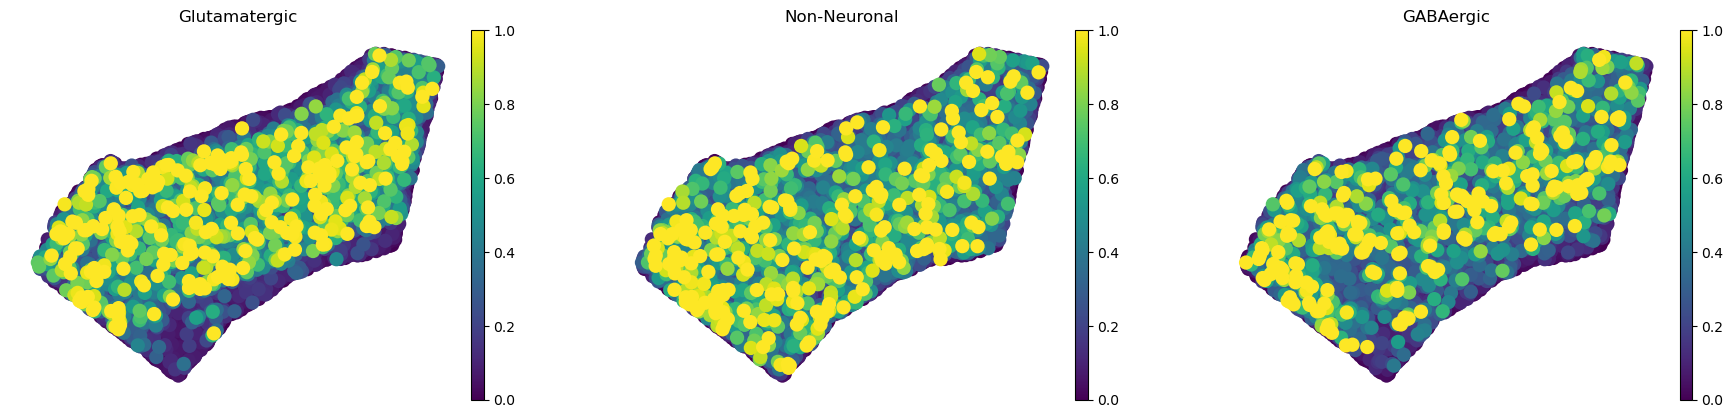

In [36]:
tg.project_cell_annotations(ad_map, ad_sp, annotation="class_label")
annotation_list = list(pd.unique(ad_sc.obs['class_label']))
tg.plot_cell_annotation_sc(ad_sp, annotation_list,spot_size=100,        # 可根据实际点大小调整
    scale_factor=1.0, perc=0.02)